In [1]:
#import dependencies
import requests
import pandas as pd
from census import Census
import seaborn as sns
import matplotlib.pyplot as plt
from config import c_key

c = Census(c_key)

In [2]:
#QUEREY PARAMETER
#occupation query prefix
oc = "C24010_"
#construction occupation codes
con = ["030E", "031E", "032E", "033E","066E", "067E", "068E", "069E"]
con_e = ["C24010_" + c for c in con]
#print(con_e)

#male STEM occupation codes
stem = ["007E", "008E", "009E","043E", "044E", "045E"]
#female STEM occupation codes
stem_e = ["C24010_" + s for s in stem]
#print(stem_e)

#active millitary citizens
mil = "B23025_006E"

#number of employed citizens
emp = "B23025_004E"

#per capita income
inc_pc = "B19301_001E"

#citizens below poverty line
poverty = "B17001_003E"

#number of citizens holding bachelor's degrees
bach = "B15003_022E"


In [3]:
#census attribute codes: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b
c14_data = c.acs5.get(("NAME", mil+","+emp+","+inc_pc+","+poverty+","+bach,
                    'C24010_030E', 'C24010_031E', 'C24010_032E', 'C24010_033E', 
                    'C24010_066E', 'C24010_067E','C24010_068E', 'C24010_069E',
                    'C24010_007E', 'C24010_008E', 'C24010_009E', 'C24010_043E', 
                    'C24010_044E', 'C24010_045E','B23025_002E','B01003_001E',"B15003_002E"), 
                    {'for': 'county:*','in': 'state:*'}, year=2014)
#add api data to dataframe
df14=pd.DataFrame(c14_data)

#rename columns
columns = ['Total Population','Residents w/o HS Eduaction','Resident w/ Bachelors Degree','Residents Below Poverty Line',
             'Per Capita Income', 'Employed Residents','Labor Force','Active Military','S1','S2','S3','C1','C2','C3','C4',
                'S4','S5','S6','C5','C6','C7','C8','Location','county','State',]
df14.columns = columns

#Run for 2013
#-------------------------------------------------------------------------------------
c13_data = c.acs5.get(("NAME", mil+","+emp+","+inc_pc+","+poverty+","+bach,
                    'C24010_030E', 'C24010_031E', 'C24010_032E', 'C24010_033E', 
                    'C24010_066E', 'C24010_067E','C24010_068E', 'C24010_069E',
                    'C24010_007E', 'C24010_008E', 'C24010_009E', 'C24010_043E', 
                    'C24010_044E', 'C24010_045E','B23025_002E','B01003_001E',"B15003_002E"), 
                    {'for': 'county:*','in': 'state:*'}, year=2013)
#add api data to dataframe
df13=pd.DataFrame(c13_data)

#rename columns
df13.columns = columns

#Run for 2012
#-------------------------------------------------------------------------------------
c12_data = c.acs5.get(("NAME", mil+","+emp+","+inc_pc+","+poverty+","+bach,
                    'C24010_030E', 'C24010_031E', 'C24010_032E', 'C24010_033E', 
                    'C24010_066E', 'C24010_067E','C24010_068E', 'C24010_069E',
                    'C24010_007E', 'C24010_008E', 'C24010_009E', 'C24010_043E', 
                    'C24010_044E', 'C24010_045E','B23025_002E','B01003_001E',"B15003_002E"), 
                    {'for': 'county:*','in': 'state:*'}, year=2012)
#add api data to dataframe
df12=pd.DataFrame(c12_data)

#rename columns
df12.columns = columns

#Run for 2011
#-------------------------------------------------------------------------------------
c11_data = c.acs5.get(("NAME", mil+","+emp+","+inc_pc+","+poverty+","
                    'C24010_030E', 'C24010_031E', 'C24010_032E', 'C24010_033E', 
                    'C24010_066E', 'C24010_067E','C24010_068E', 'C24010_069E',
                    'C24010_007E', 'C24010_008E', 'C24010_009E', 'C24010_043E', 
                    'C24010_044E', 'C24010_045E','B23025_002E','B01003_001E'), 
                    {'for': 'county:*','in': 'state:*'}, year=2011)
#add api data to dataframe
df11=pd.DataFrame(c11_data)

columns11 = ['Total Population','Residents Below Poverty Line',
             'Per Capita Income', 'Employed Residents','Labor Force','Active Military','S1','S2','S3','C1','C2','C3','C4',
             'S4','S5','S6','C5','C6','C7','C8','Location','county','State',]

#rename columns
df11.columns = columns11



In [4]:
#calcualte new columns

df14['Construction Residents']=(df14['C1']+df14['C2']+df14['C3']+df14['C4']+df14['C5']+df14['C6']+df14['C7']+df14['C8'])
df14['STEM Residents']=(df14['S1']+df14['S2']+df14['S3']+df14['S4']+df14['S5']+df14['S6'])
df14['Poverty Percentage']=df14['Residents Below Poverty Line']/df14['Total Population']

df13['Construction Residents']=(df13['C1']+df13['C2']+df13['C3']+df13['C4']+df13['C5']+df13['C6']+df13['C7']+df13['C8'])
df13['STEM Residents']=(df13['S1']+df13['S2']+df13['S3']+df13['S4']+df13['S5']+df13['S6'])
df13['Poverty Percentage']=df13['Residents Below Poverty Line']/df13['Total Population']

df12['Construction Residents']=(df12['C1']+df12['C2']+df12['C3']+df12['C4']+df12['C5']+df12['C6']+df12['C7']+df12['C8'])
df12['STEM Residents']=(df12['S1']+df12['S2']+df12['S3']+df12['S4']+df12['S5']+df12['S6'])
df12['Poverty Percentage']=df12['Residents Below Poverty Line']/df12['Total Population']

df11['Construction Residents']=(df11['C1']+df11['C2']+df11['C3']+df11['C4']+df11['C5']+df11['C6']+df11['C7']+df11['C8'])
df11['STEM Residents']=(df11['S1']+df11['S2']+df11['S3']+df11['S4']+df11['S5']+df11['S6'])
df11['Poverty Percentage']=df11['Residents Below Poverty Line']/df11['Total Population']

In [5]:
#filter df
clean_df14 = df14[['Total Population','Per Capita Income','Residents Below Poverty Line','Poverty Percentage',
              'Location']]


clean_df13 = df13[['Total Population','Per Capita Income','Residents Below Poverty Line','Poverty Percentage',
              'Employed Residents','Labor Force','Active Military','Construction Residents','STEM Residents',
              'Location']]


clean_df12 = df12[['Total Population','Per Capita Income','Residents Below Poverty Line','Poverty Percentage',
              'Employed Residents','Labor Force','Active Military','Construction Residents','STEM Residents',
              'Location']]


clean_df11 = df11[['Total Population','Per Capita Income','Residents Below Poverty Line','Poverty Percentage',
              'Employed Residents','Labor Force','Active Military','Construction Residents','STEM Residents',
              'Location']]


first_merge = pd.merge(clean_df14, clean_df13, how='outer')
second_merge = pd.merge(first_merge, clean_df12, how='outer')
final_merge = pd.merge(second_merge, clean_df11, how='outer')
print(final_merge)

       Total Population  Per Capita Income  Residents Below Poverty Line  \
0             9974203.0            27987.0                      824805.0   
1              152452.0            17797.0                       15692.0   
2              256802.0            58004.0                       10290.0   
3               17946.0            28327.0                        1458.0   
4               87612.0            23712.0                        8387.0   
5              261609.0            18464.0                       31319.0   
6                9335.0            21830.0                         815.0   
7               14193.0            29578.0                         314.0   
8              424927.0            25048.0                       32797.0   
9              139253.0            35092.0                        6695.0   
10              98606.0            32117.0                        5817.0   
11            3086331.0            34416.0                      182425.0   
12          

C:\Users\johns\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\johns\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


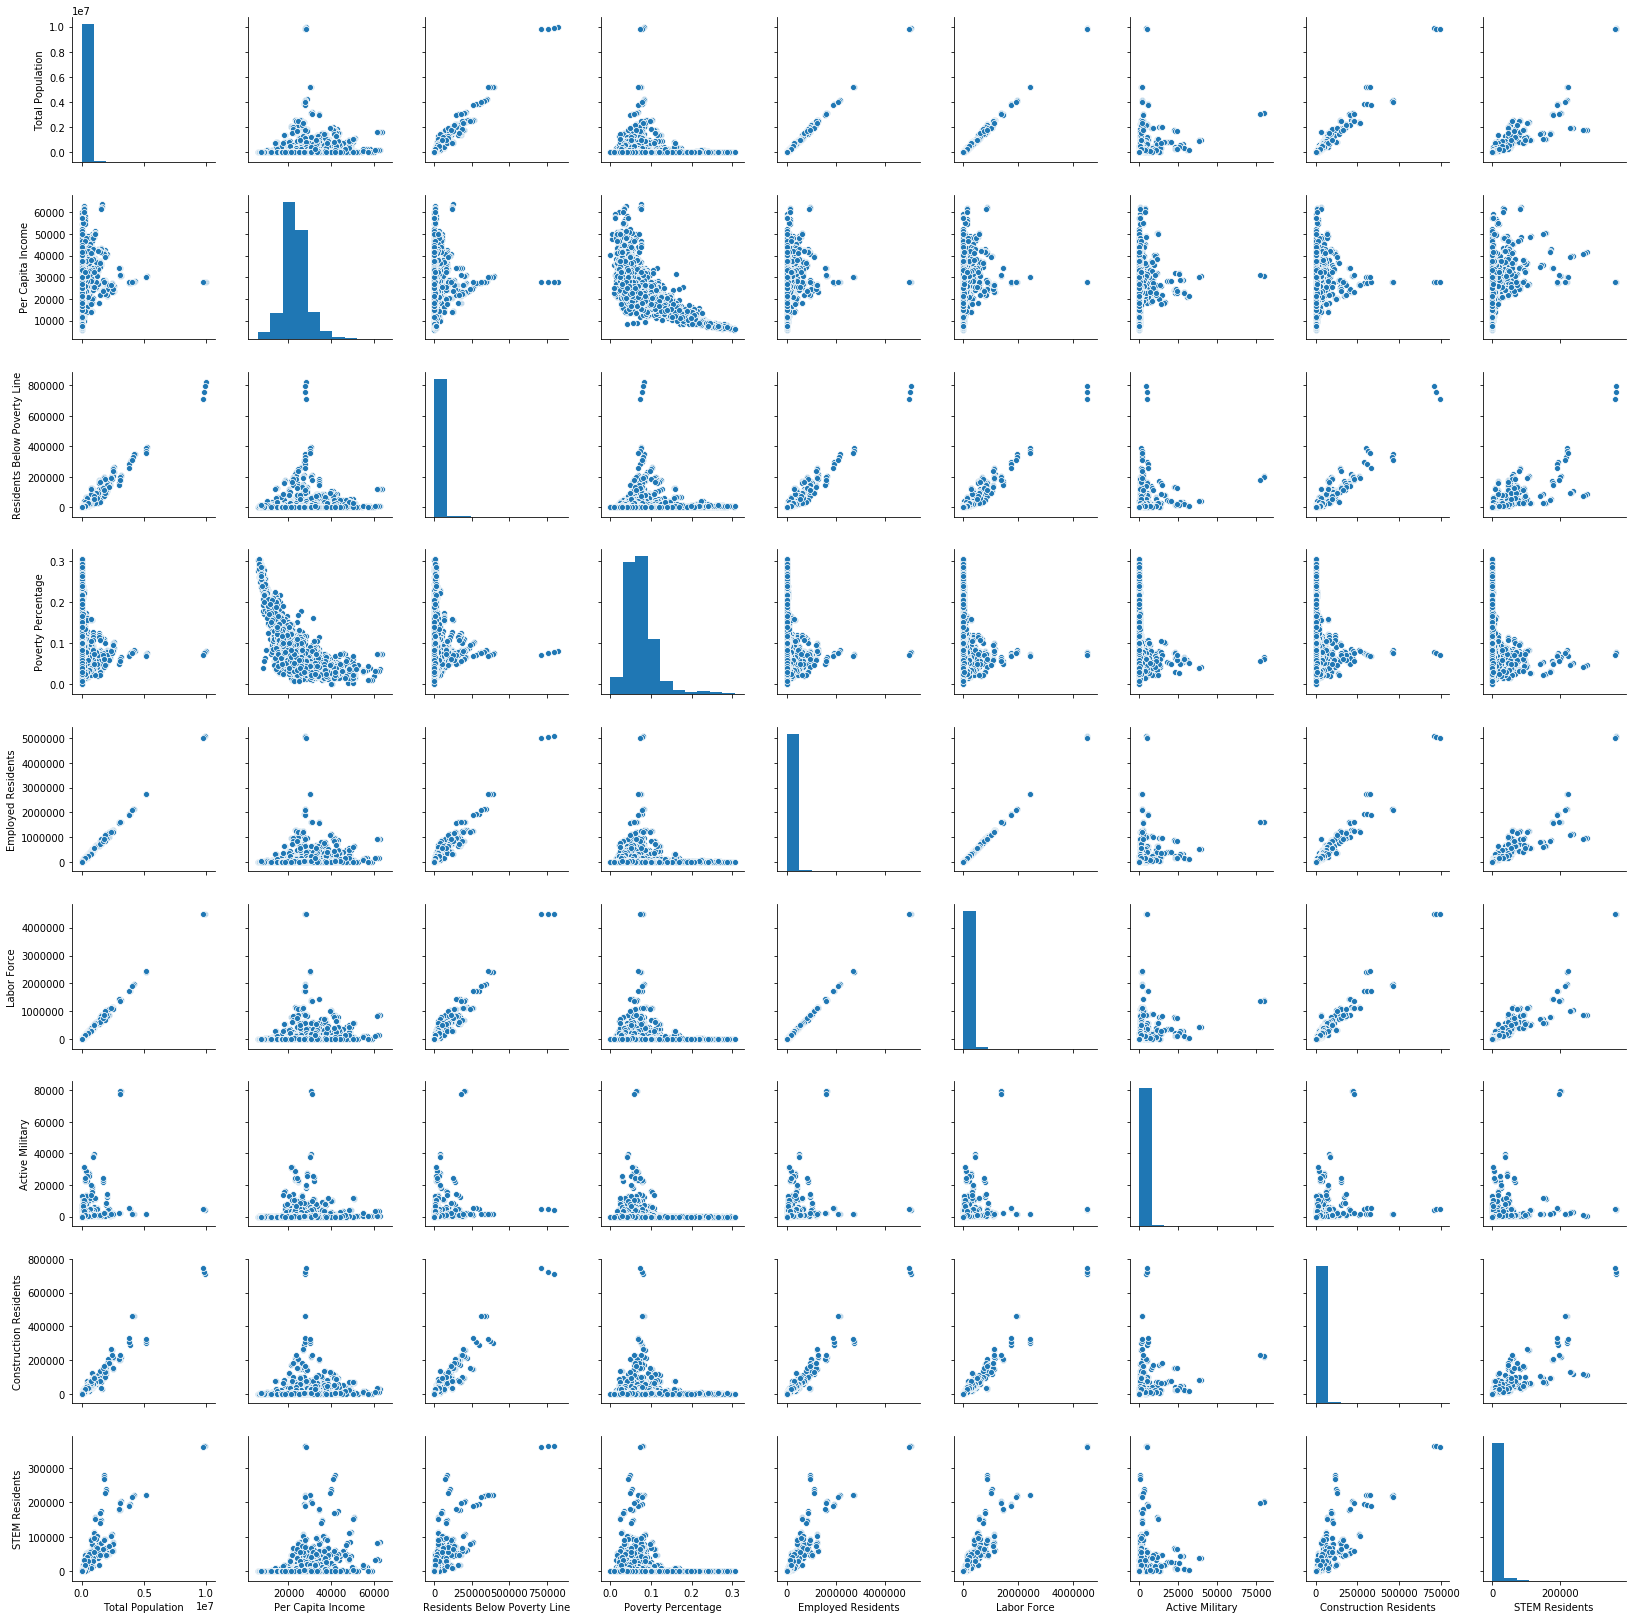

In [6]:
sns.pairplot(final_merge)
plt.show()

#these don't mean anything, I just wanted to get a little practice using them


